<a href="https://colab.research.google.com/github/Fahdlabba/Trash-Recognition-And-Classification/blob/main/Trash_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d vencerlanz09/taco-dataset-yolo-format

 91% 212M/232M [00:03<00:00, 77.8MB/s]
100% 232M/232M [00:03<00:00, 73.7MB/s]


In [6]:
from zipfile import ZipFile
path ="/content/taco-dataset-yolo-format.zip"
with ZipFile(path,"r")as zip :
  zip.extractall()

In [7]:
!mkdir YoloV8

In [8]:
!mv test YoloV8

In [9]:
!mv train YoloV8

In [10]:
!mv valid YoloV8

In [11]:
!mv data.yaml YoloV8/

In [12]:
!rm README.dataset.txt
!rm README.roboflow.txt

In [13]:
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

import random


In [14]:
train_image_path ="/content/YoloV8/train/images"

In [15]:
!ls /content/YoloV8/train

images	labels


In [16]:
images_list=os.listdir(train_image_path)
label_list=os.listdir("/content/YoloV8/train/labels")
len(images_list)

4200

In [17]:
def plot_img():
  for i in range(3):
    random_indice=random.randint(0,99)
    img=Image.open(train_image_path+'/'+images_list[random_indice])
    fig,axs=plt.subplots(figsize=(4,4))
    axs.imshow(img)
    plt.show()

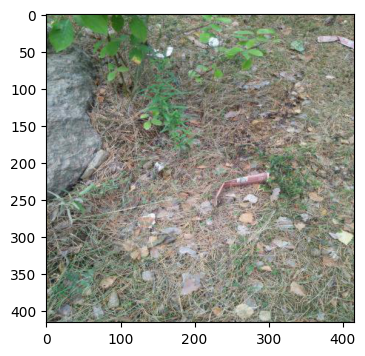

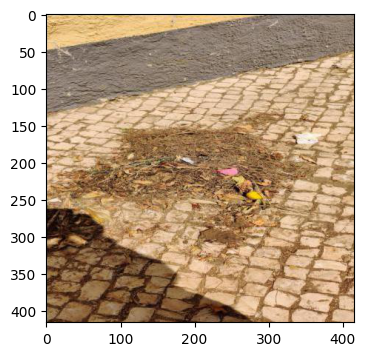

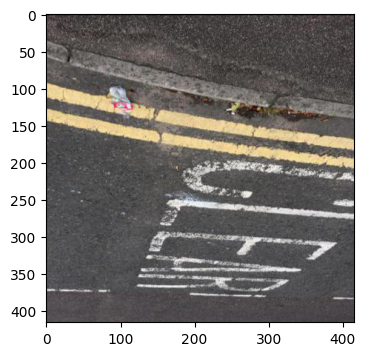

In [18]:
plot_img()

In [19]:
!mkdir train_result

In [20]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.2/611.2 kB 8.4 MB/s eta 0:00:00


In [21]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

# Train the model
model.train(data='/content/YoloV8/data.yaml', epochs=20, batch=32,project="/content/train_result")


100%|██████████| 6.23M/6.23M [00:00<00:00, 80.0MB/s]
Ultralytics YOLOv8.0.119 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/YoloV8/data.yaml, epochs=20, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/train_result, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True,

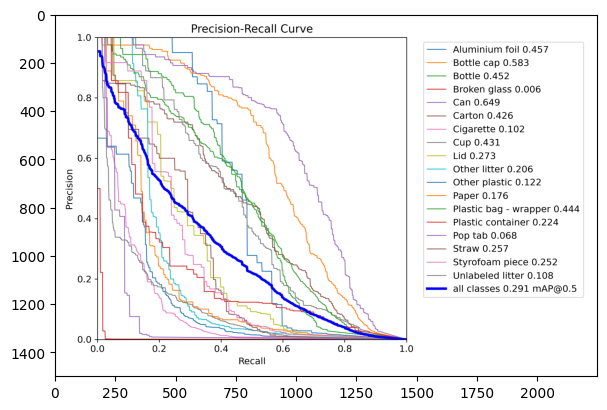

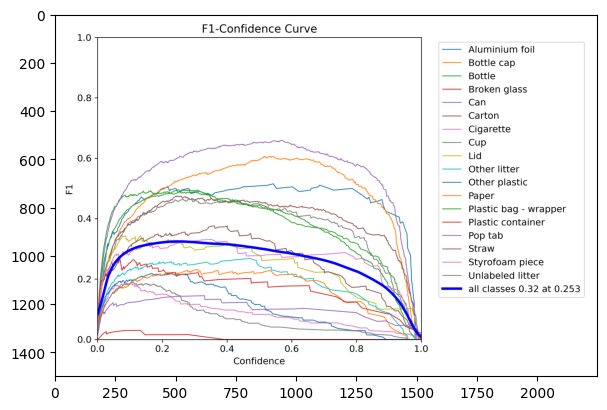

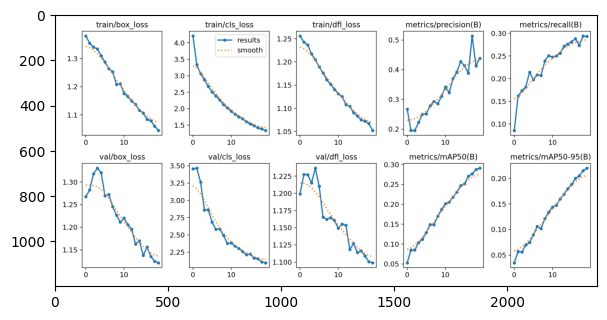

In [23]:
metrics=["/content/train_result/train/PR_curve.png","/content/train_result/train/F1_curve.png","/content/train_result/train/results.png"]
def display (metrics):
  for metric in metrics :
    fig , axs =plt.subplots(figsize=(7,7))
    img=plt.imread(metric)
    axs.imshow(img)
display(metrics)

let's validate our model with 0.4 confidence

In [24]:
model =YOLO("/content/train_result/train/weights/best.pt")

model.val(data="/content/YoloV8/data.yaml",project="/content/train_result",conf=0.4)

Ultralytics YOLOv8.0.119 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3009158 parameters, 0 gradients
val: Scanning /content/YoloV8/valid/labels.cache... 1704 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:45<00:00,  2.37it/s]
                   all       1704       4830      0.534      0.251      0.405      0.333
        Aluminium foil       1704         62      0.641      0.403      0.573      0.465
            Bottle cap       1704        459      0.566      0.573      0.621      0.494
                Bottle       1704        320      0.731      0.331      0.543      0.422
          Broken glass       1704        123          0          0          0          0
                   Can       1704        267       0.66      0.625      0.677      0.561
                Carton       1704   

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f7697e74d90>
fitness: 0.3401365359238724
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.46546,      0.4941,     0.42242,           0,     0.56138,     0.40096,     0.19643,     0.42993,     0.39236,     0.36659,     0.24816,     0.24072,     0.38952,     0.31342,     0.18793,     0.33565,     0.35346,     0.19486])
names: {0: 'Aluminium foil', 1: 'Bottle cap', 2: 'Bottle', 3: 'Broken glass', 4: 'Can', 5: 'Carton', 6: 'Cigarette', 7: 'Cup', 8: 'Lid', 9: 'Other litter', 10: 'Other plastic', 11: 'Paper', 12: 'Plastic bag - wrapper', 13: 'Plastic container', 14: 'Pop tab', 15: 'Straw', 16: 'Styrofoam piece', 17: 'Unlabeled litter'}
plot:

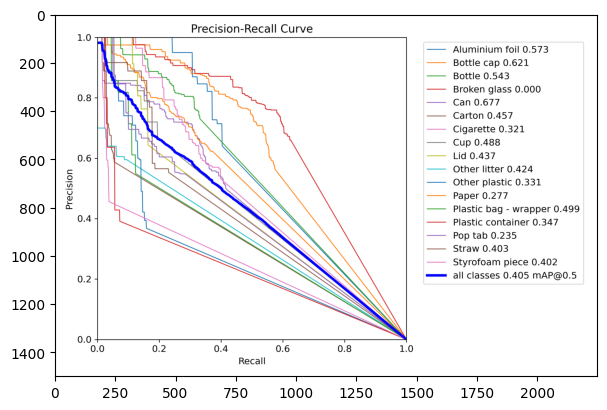

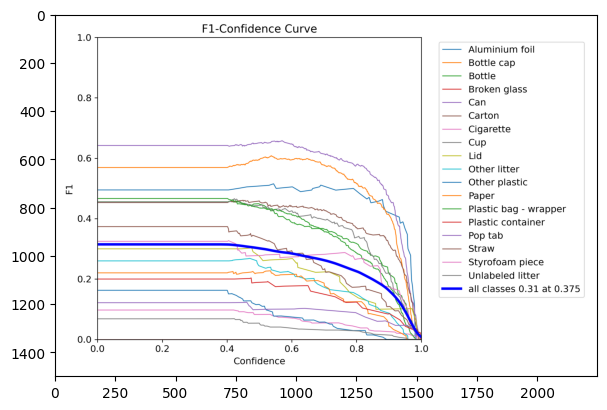

In [26]:
metrics=["/content/train_result/val/PR_curve.png","/content/train_result/val/F1_curve.png"]
display(metrics)

In [27]:
model.predict(source="/content/YoloV8/test/images", save=True, conf=0.4)


image 1/100 /content/YoloV8/test/images/000000_jpg.rf.1b029d4c742673020fa91367070f5f51.jpg: 640x640 1 Bottle cap, 1 Bottle, 1 Cup, 15.6ms
image 2/100 /content/YoloV8/test/images/000000_jpg.rf.c74a32a1e0ac35591aa5f3279b58ee6f.jpg: 640x640 1 Can, 8.7ms
image 3/100 /content/YoloV8/test/images/000001_JPG_jpg.rf.3d60dcc577d36500338d022c84651afe.jpg: 640x640 1 Straw, 9.5ms
image 4/100 /content/YoloV8/test/images/000002_JPG_jpg.rf.3b3330b9601052ca754674984f0b6da4.jpg: 640x640 (no detections), 7.7ms
image 5/100 /content/YoloV8/test/images/000003_JPG_jpg.rf.9ea3cfffc033c9a937d08ddb0bd21d60.jpg: 640x640 1 Cup, 7.8ms
image 6/100 /content/YoloV8/test/images/000003_JPG_jpg.rf.b946402ebe11cc3bc98c7d831a273d56.jpg: 640x640 (no detections), 9.8ms
image 7/100 /content/YoloV8/test/images/000003_jpg.rf.525f8e1039f28d4bfd3b190b2adfdbbc.jpg: 640x640 1 Bottle cap, 1 Plastic bag - wrapper, 1 Unlabeled litter, 9.6ms
image 8/100 /content/YoloV8/test/images/000003_jpg.rf.54d6dc93cee9ec59063f84d8cda515d9.jpg: 6

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'Aluminium foil', 1: 'Bottle cap', 2: 'Bottle', 3: 'Broken glass', 4: 'Can', 5: 'Carton', 6: 'Cigarette', 7: 'Cup', 8: 'Lid', 9: 'Other litter', 10: 'Other plastic', 11: 'Paper', 12: 'Plastic bag - wrapper', 13: 'Plastic container', 14: 'Pop tab', 15: 'Straw', 16: 'Styrofoam piece', 17: 'Unlabeled litter'}
 orig_img: array([[[ 91, 100, 113],
         [ 86,  95, 108],
         [ 93, 102, 115],
         ...,
         [104, 116, 118],
         [107, 119, 121],
         [106, 118, 120]],
 
        [[166, 175, 188],
         [161, 170, 183],
         [163, 172, 185],
         ...,
         [172, 184, 186],
         [170, 182, 184],
         [165, 177, 179]],
 
        [[151, 160, 173],
         [150, 159, 172],
         [151, 160, 173],
         ...,
         [175, 187, 189],
         [169, 181, 183],
         [159

In [36]:
predicted_images=os.listdir("/content/runs/detect/predict")

In [37]:
def random_plot():
  for i in range(2):
    random_indice=random.randint(0,99)
    pre_img=Image.open("/content/runs/detect/predict/"+predicted_images[random_indice])
    fig,axs=plt.subplots(figsize=(4,4))
    axs.imshow(pre_img)
    plt.show()

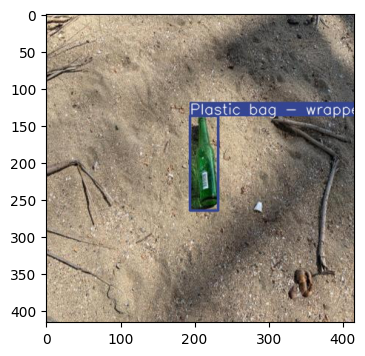

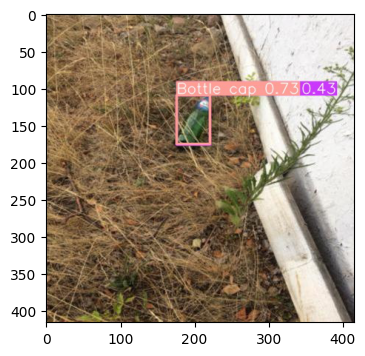

In [43]:
random_plot()